In [146]:
from glob import glob
import importlib
import sys
from pathlib import Path
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from StudentProtocols import utils

# Fixing random state for reproducibility
np.random.seed(19680801)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
n = 32 # 1 <= n <= 100
p = 0.03 # 0 <= p <= 0.15
N_trials = 1000

In [150]:
team_modules = list(filter(
    lambda tm: all(ignore not in tm for ignore in ["__init__.py", "utils.py"]), 
    glob("StudentProtocols/*.py")))

team_to_results = {}
for tm in team_modules:
    team_name = Path(tm).stem
    print(f"Testing {team_name}...")
    try:
        proto_module = importlib.import_module(f"StudentProtocols.{team_name}")
        proto_module = importlib.reload(proto_module)
        tester = utils.ProtocolTester(n, p, proto_module.Protocol)
        results = tester.run_protocol(N_trials, verbose=False)
    except Exception as e:
        print(f"{team_name} failed w/ error:")
        print(e)
    print()
    team_to_results[team_name] = results
print("Done!")
team_names = list(team_to_results.keys())

table = PrettyTable()
table.field_names = ["Group Name", "Mean", "Variance"]
for team_name, results in sorted(team_to_results.items(), key=lambda pair: np.mean(pair[1])):
    run_info = stats.describe(results)
    table.add_row([team_name, np.round(run_info.mean, 3), np.round(run_info.variance, 3)])

print(table)

Testing Baseline...

Testing ProjectOwler...

Done!
+--------------+-------+----------+
|  Group Name  |  Mean | Variance |
+--------------+-------+----------+
| ProjectOwler | 7.129 |  30.643  |
|   Baseline   |  32.0 |   0.0    |
+--------------+-------+----------+


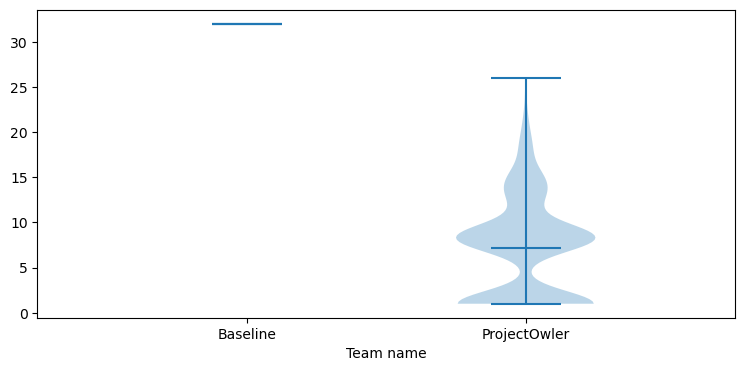

In [154]:
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Team name')


fig, ax = plt.subplots(figsize=(9, 4))
ax.violinplot(
    [team_to_results[tn] for tn in team_names],
    showmeans=True)
set_axis_style(ax, team_names)
plt.show()
